In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
import shap

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv('data.csv')
data = data.dropna()
X = data.drop(columns=['time_id','stock_id','RV'])
y = data['RV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
len(data.columns)

35

In [20]:
model = xgb.XGBRegressor(n_estimators=1000,max_depth=10)
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [25]:
y_pred = model.predict(X_test)
print(mean_squared_error(y_pred=y_pred,y_true=y_test))
print(mean_absolute_error(y_pred=y_pred,y_true=y_test))

7.569765835132239e-10
1.78261705477318e-05


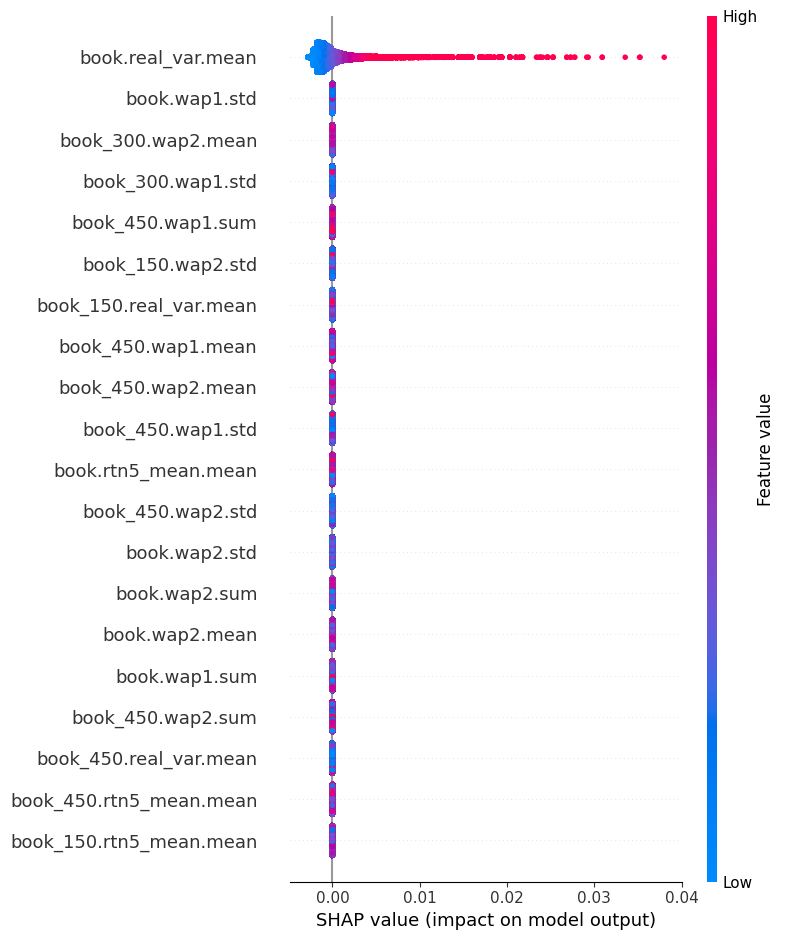

In [26]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)
feature_names = X.columns
# 绘制 SHAP 摘要图
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In [30]:
print(model.feature_importances_)
# print(X.columns)

[0.0000000e+00 0.0000000e+00 2.6883659e-04 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 9.9858963e-01 0.0000000e+00 4.0726806e-04
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.0419012e-04 2.2051806e-04
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.0956867e-04
 0.0000000e+00 0.0000000e+00]


In [29]:
X = data[['book.wap1.std','book_450.wap1.sum','book_300.wap1.std','book_300.wap2.mean','book_150.wap2.std']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = xgb.XGBRegressor(n_estimators=1000,max_depth=10)
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [40]:
y_pred = model.predict(X_test)

In [41]:
def rmspe(y_true, y_pred):
    """
    Calculate Root Mean Squared Percentage Error (RMSPE).
    
    Parameters:
    y_true (array-like): Array of true target values.
    y_pred (array-like): Array of predicted target values.
    
    Returns:
    float: RMSPE value.
    """
    assert len(y_true) == len(y_pred), "Length of y_true and y_pred must be the same."
    
    # Exclude cases where y_true is zero to avoid division by zero
    mask = y_true != 0
    
    # Calculate percentage error
    pe = (y_true - y_pred) / y_true
    pe = np.abs(pe[mask])
    
    # Calculate squared percentage error
    spe = pe ** 2
    
    # Calculate mean squared percentage error
    mspe = np.mean(spe)
    
    # Calculate RMSPE
    rmspe = np.sqrt(mspe)
    
    return rmspe

In [42]:
print(mean_squared_error(y_pred=y_pred,y_true=y_test))
print(mean_absolute_error(y_pred=y_pred,y_true=y_test))
# print(np.sqrt(np.mean(((y_test-y_pred)/y_test))**2))
# np.sum(((y_test-y_pred)/y_test)**2)
print(rmspe(y_true=y_test,y_pred=y_pred))

1.399258285555456e-06
0.0007150424738545247
0.3385034744779589


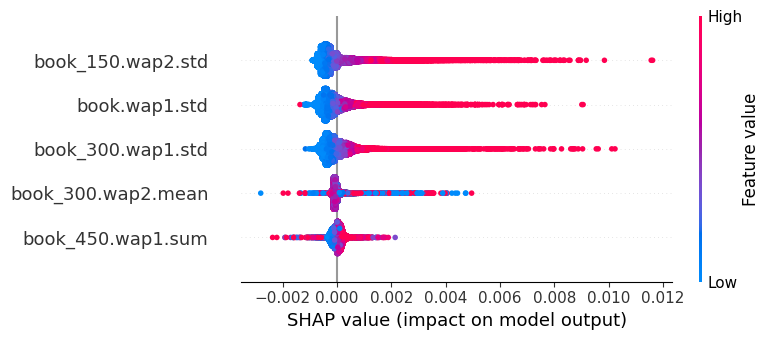

In [33]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)
feature_names = X.columns
# 绘制 SHAP 摘要图
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In [43]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(mean_squared_error(y_pred=y_pred,y_true=y_test))
print(mean_absolute_error(y_pred=y_pred,y_true=y_test))
# print(np.sqrt(np.mean(((y_test-y_pred)/y_test))**2))
print(rmspe(y_true=y_test,y_pred=y_pred))

1.5498442455698953e-06
0.0007625354799668619
0.3799195799704304


In [44]:
Ls = Lasso()
Ls.fit(X_train,y_train)
y_pred = Ls.predict(X_test)
print(mean_squared_error(y_pred=y_pred,y_true=y_test))
print(mean_absolute_error(y_pred=y_pred,y_true=y_test))
print(rmspe(y_true=y_test,y_pred=y_pred))

5.364614866762005e-06
0.0015273603574409362
0.953892712589019


In [45]:
rg = Ridge()
rg.fit(X_train,y_train)
y_pred = rg.predict(X_test)
print(mean_squared_error(y_pred=y_pred,y_true=y_test))
print(mean_absolute_error(y_pred=y_pred,y_true=y_test))
print(rmspe(y_true=y_test,y_pred=y_pred))

2.75900242507351e-06
0.0010725065406499688
0.6533603427972214
